<a href="https://colab.research.google.com/github/rizqiwr/DataScience/blob/main/everythingstock/Stock_Analysis_Using_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 597 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date       Open        High        Low      Close  Adj Close  \
247 2022-12-06  99.669998  100.209999  96.760002  97.309998  97.309998   
248 2022-12-07  96.769997   97.309998  95.025002  95.150002  95.150002   
249 2022-12-08  95.690002   95.870003  93.800003  93.949997  93.949997   
250 2022-12-09  93.900002   94.489998  93.019997  93.070000  93.070000   
251 2022-12-12  93.089996   93.875000  91.900002  93.559998  93.559998   

       Volume  
247  20877600  
248  26647900  
249  25593200  
250  21873700  
251  27363900  


In [3]:
data = data[["Date", "Close"]]
print(data.head())

        Date       Close
0 2021-12-13  146.704498
1 2021-12-14  144.970505
2 2021-12-15  147.368500
3 2021-12-16  144.838501
4 2021-12-17  142.802994


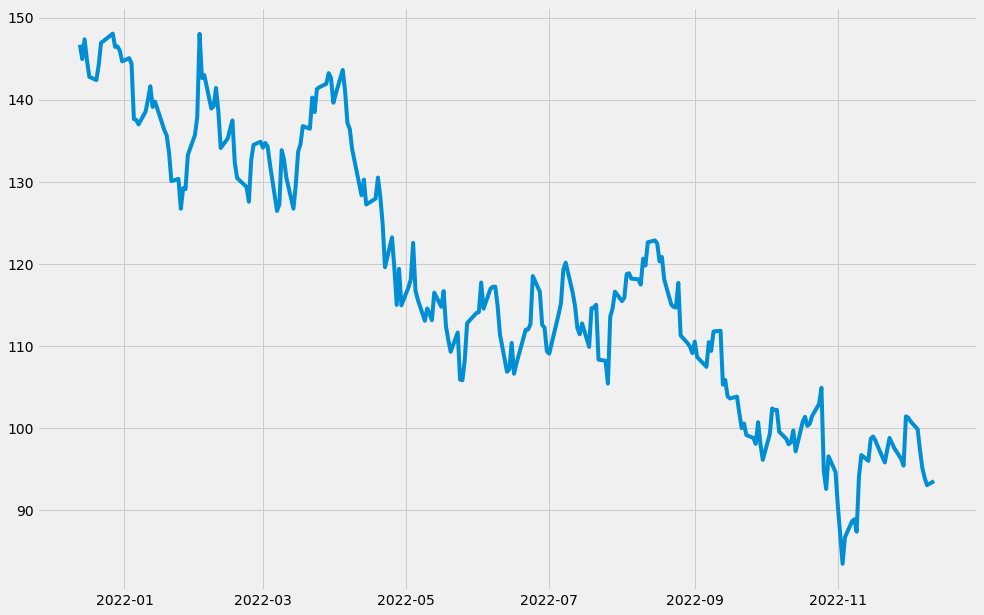

In [4]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

<ipython-input-5-67a9c41f08df>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(data["Close"],


<Figure size 432x288 with 0 Axes>

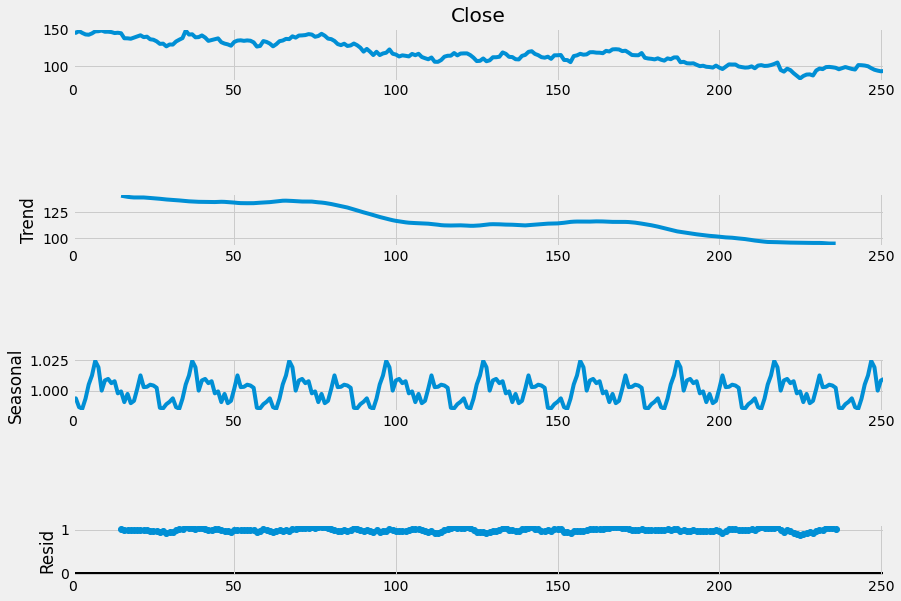

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

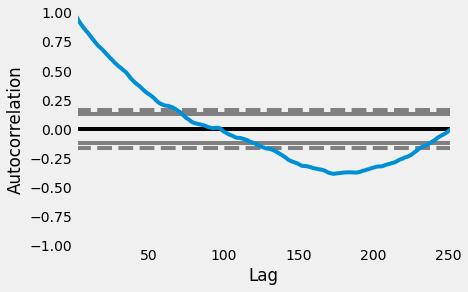

In [6]:
pd.plotting.autocorrelation_plot(data["Close"])

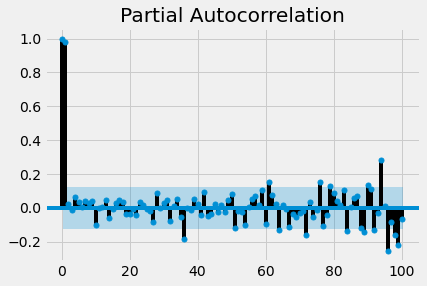

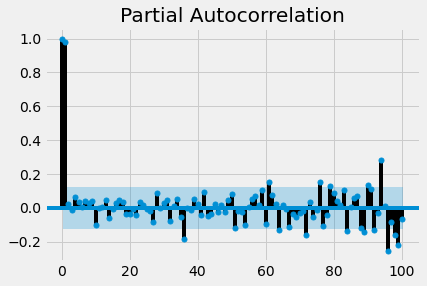

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [8]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data["Close"], order=(p,d,q))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  251
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -609.893
Method:                       css-mle   S.D. of innovations              2.733
Date:                Tue, 13 Dec 2022   AIC                           1237.786
Time:                        14:52:48   BIC                           1269.515
Sample:                             1   HQIC                          1250.554
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2133      0.155     -1.380      0.168      -0.516       0.090
ar.L1.D.Close     0.0414      0.073      0.565      0.572      -0.102       0.185
ar.L2.D.Close    -1.0064      0.063    -

In [9]:
predictions = fitted.predict()
print(predictions)

2     -0.150196
3     -0.279266
4     -0.091672
5     -0.247491
6      0.002559
         ...   
247    0.074257
248   -0.215942
249   -0.300375
250    0.127738
251    0.230566
Length: 250, dtype: float64


In [10]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  252
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -596.818
Date:                            Tue, 13 Dec 2022   AIC                           1223.636
Time:                                    14:54:38   BIC                           1275.783
Sample:                                         0   HQIC                          1244.650
                                            - 252                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7447      4.030     -0.185      0.853      -8.643       7.154
ar.L2          0.0759      3.506   

In [11]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

252    93.398471
253    93.568272
254    94.320380
255    92.582073
256    91.296286
257    90.597527
258    90.311144
259    91.369380
260    91.108670
261    91.077813
262    91.253972
Name: predicted_mean, dtype: float64


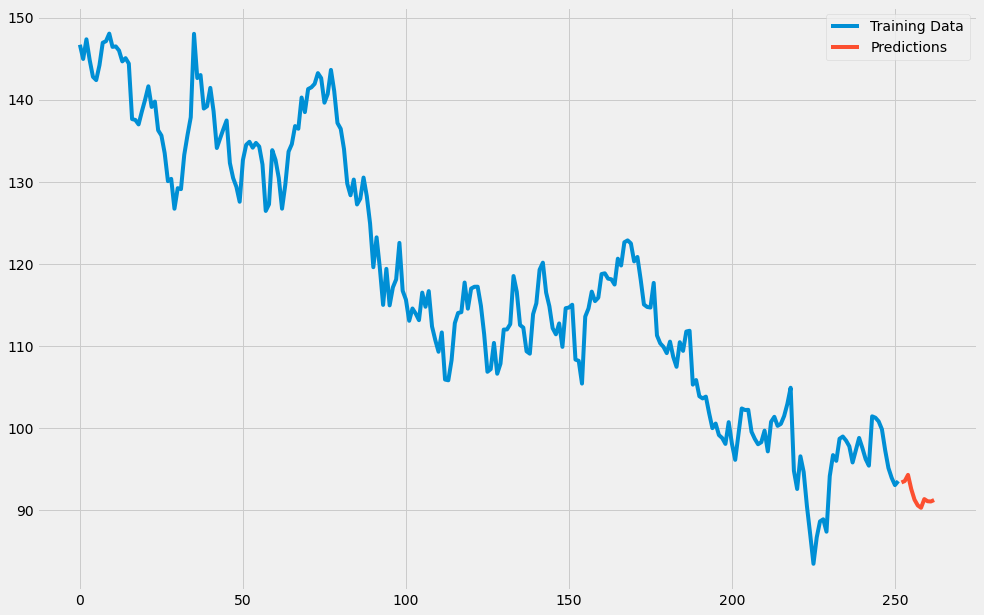

In [12]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")